In [409]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
from pathlib import Path
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

In [198]:
root = Path('./datasets')
zipn = 'house-prices-advanced-regression-techniques.zip'


with ZipFile(root/zipn, 'r') as f:
    f.extractall(root)

In [199]:
os.listdir(root)

['test.csv',
 'data_description.txt',
 'house-prices-advanced-regression-techniques.zip',
 'train.csv',
 'sample_submission.csv']

# Data analysis

In [200]:
train_df = pd.read_csv(root/'train.csv')
test_df = pd.read_csv(root/'test.csv')

pd.set_option('precision', 4)

In [201]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,...,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.000,1460.0000,1460.0000,1460.0000
mean,730.50,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,...,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.489,6.3219,2007.8158,180921.1959
std,421.61,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,...,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.123,2.7036,1.3281,79442.5029
min,1.00,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,1.0000,2006.0000,34900.0000
25%,365.75,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,5.0000,2007.0000,129975.0000
50%,730.50,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,...,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.000,6.0000,2008.0000,163000.0000
75%,1095.25,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,...,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.000,8.0000,2009.0000,214000.0000
max,1460.00,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,...,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.000,12.0000,2010.0000,755000.0000


In [7]:
# explore missing value
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_df.shape
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
vars_with_na = [var for var in train_df.columns if train_df[var].isnull().any()]

print(vars_with_na)
print(len(vars_with_na))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
19


In [10]:
# density
train_df[vars_with_na].isnull().mean()

LotFrontage     0.1774
Alley           0.9377
MasVnrType      0.0055
MasVnrArea      0.0055
BsmtQual        0.0253
BsmtCond        0.0253
BsmtExposure    0.0260
BsmtFinType1    0.0253
BsmtFinType2    0.0260
Electrical      0.0007
FireplaceQu     0.4726
GarageType      0.0555
GarageYrBlt     0.0555
GarageFinish    0.0555
GarageQual      0.0555
GarageCond      0.0555
PoolQC          0.9952
Fence           0.8075
MiscFeature     0.9630
dtype: float64

In [11]:
# observe the median of the target where data is missing

def plot_target_on_missing(orig_df, var):
    df = orig_df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.show()
    

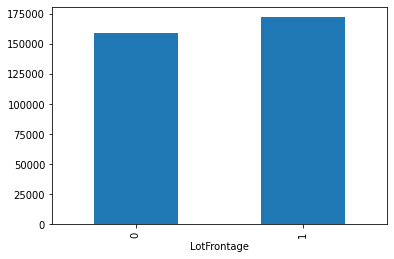

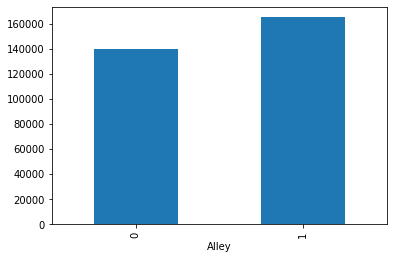

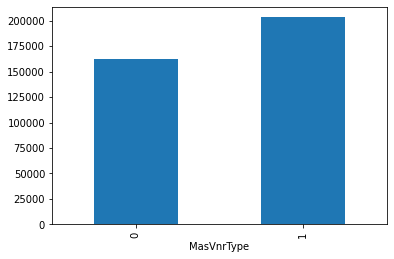

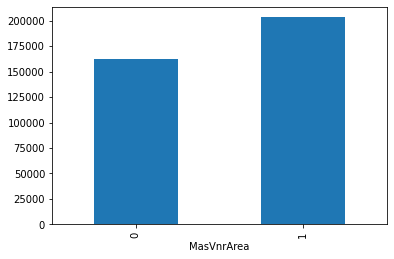

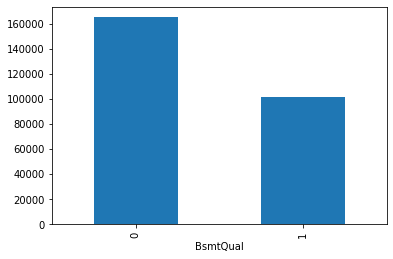

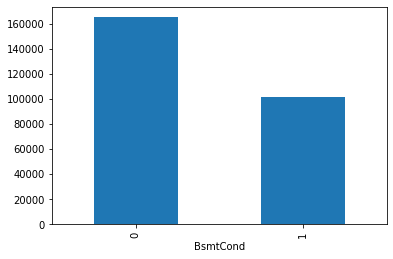

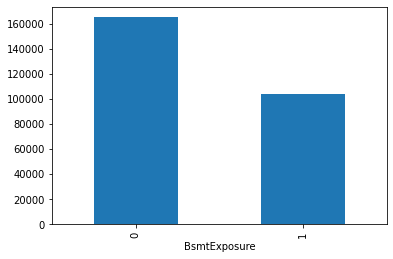

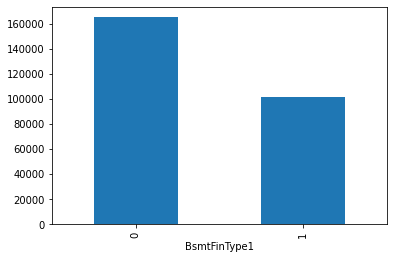

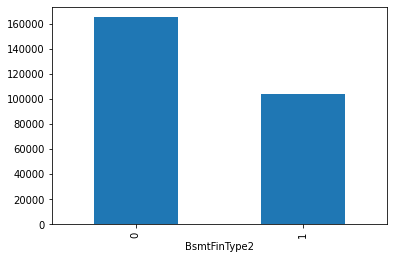

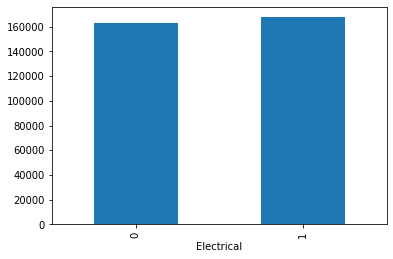

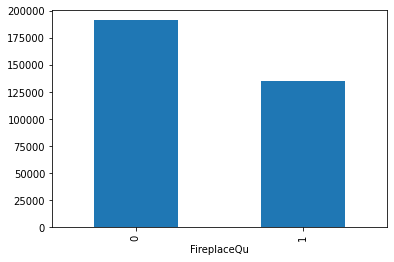

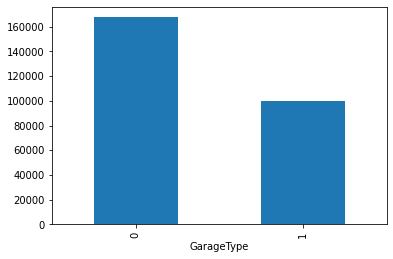

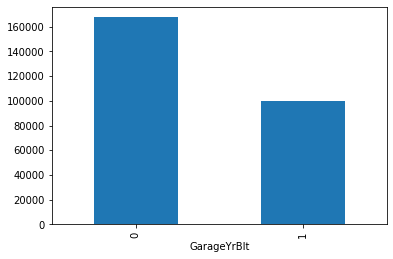

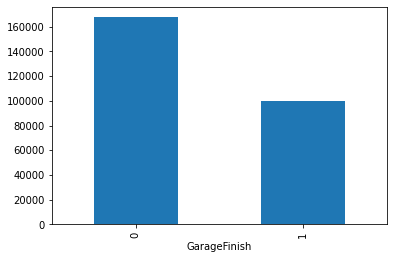

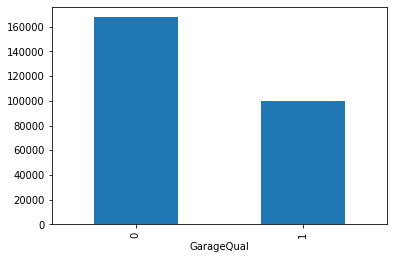

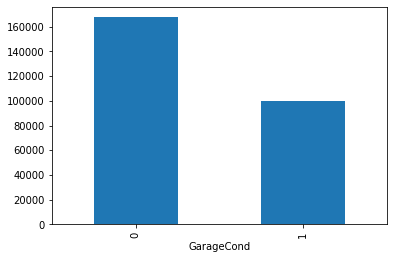

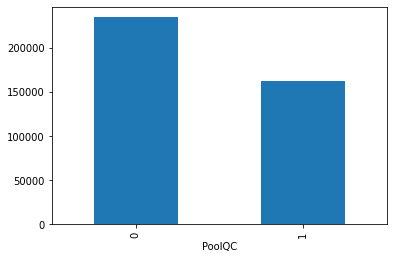

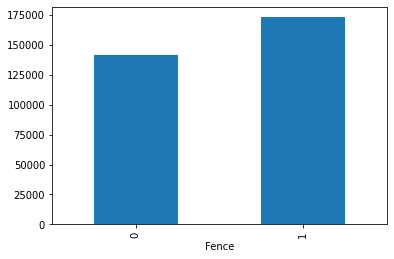

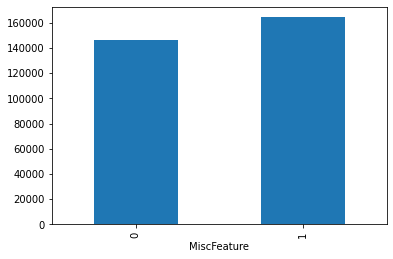

In [12]:
for var in vars_with_na:
    plot_target_on_missing(train_df, var)

In [209]:
## Filter numerical feature

num_vars = [var for var in train_df.columns if train_df[var].dtype != 'object' and var not in ['SalePrice']]
cat_vars = [var for var in train_df.columns if train_df[var].dtype == 'object' and var not in ['SalePrice']]

print(f'num vars: {num_vars}')
print(f'cat vars: {cat_vars}')

num vars: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
cat vars: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish'

In [14]:
train_df[num_vars].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
for var in train_df.columns:
    if len(train_df[var].unique())/len(train_df) > 0.9:
        print(var)

Id


In [46]:
## temporal variable
temp_vars = [var for var in train_df.columns if 'Yr' in var or 'Year' in var]
print(temp_var)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


<AxesSubplot:xlabel='YrSold'>

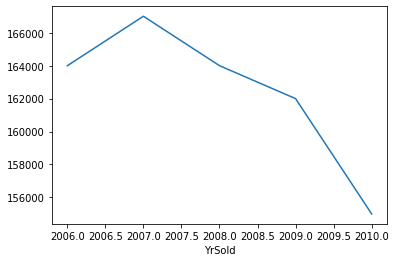

In [23]:
train_df.groupby('YrSold')['SalePrice'].median().plot()

In [34]:
def analyze_year_vars(orig_df, var):
    
    df = orig_df.copy()
    df['interval'] = df['YrSold'] - df[var]
    plt.scatter(df['interval'], df['SalePrice'])
    plt.title(var)
    plt.show()

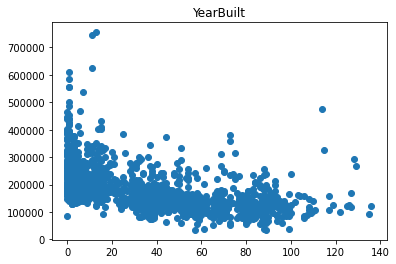

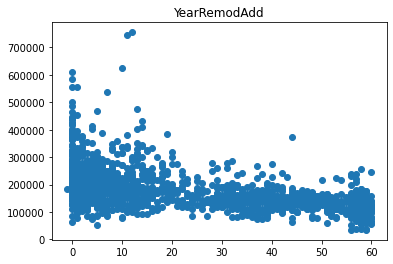

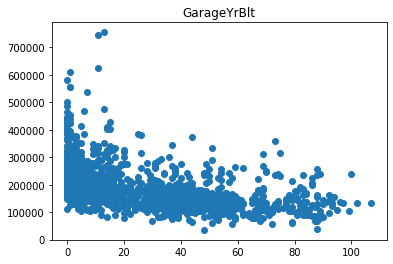

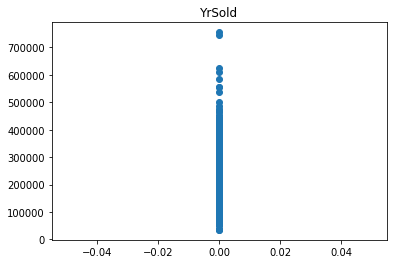

In [36]:
for var in temp_var:
    analyze_year_vars(train_df, var)

In [48]:
## Discrete variable
dis_vars = [var for var in num_vars if len(train_df[var].unique()) < 20]
for var in temp_vars:
    if var in dis_vars:
        dis_vars.remove(var)

In [74]:
def analyze_discrete_vars(orig_df, var):
    df = orig_df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar(x=var, y='SalePrice', rot=0)
    plt.title(var)
    plt.show()

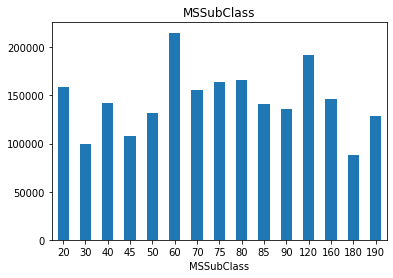

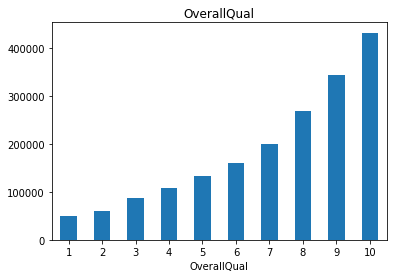

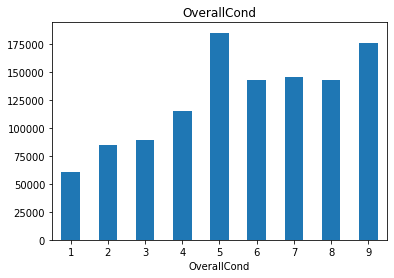

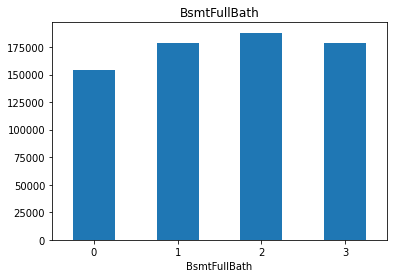

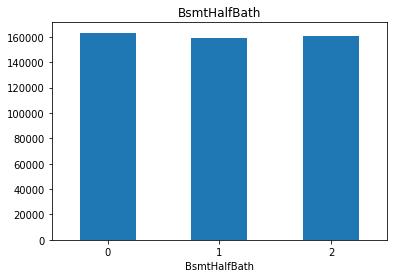

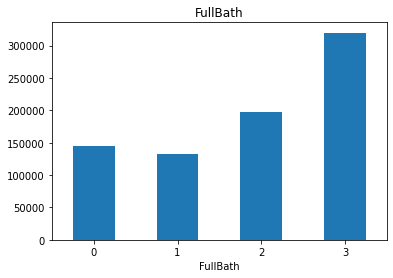

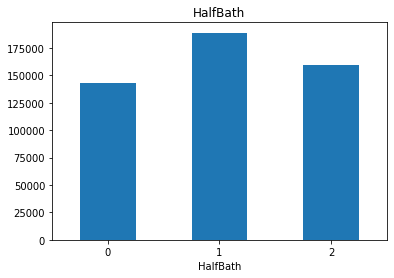

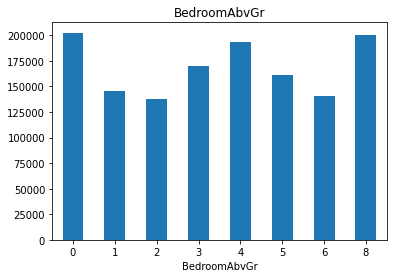

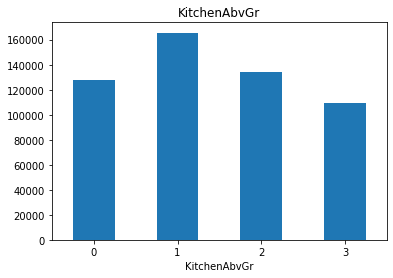

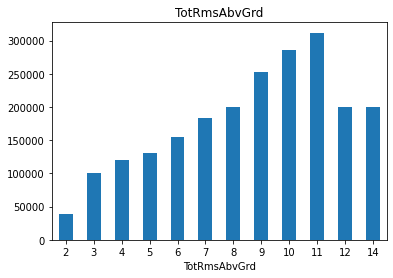

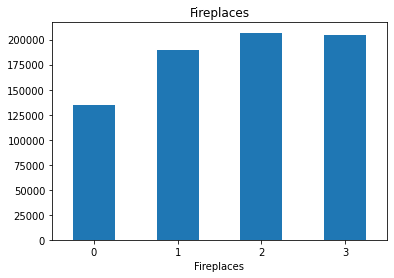

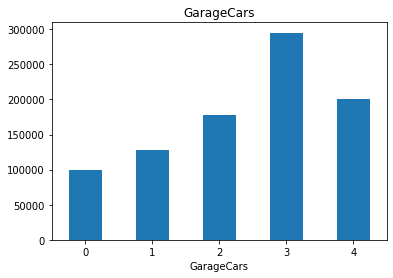

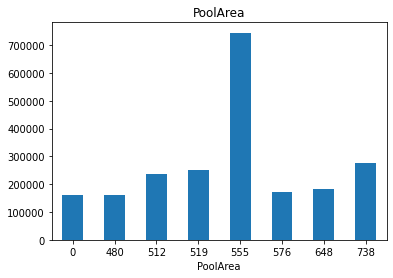

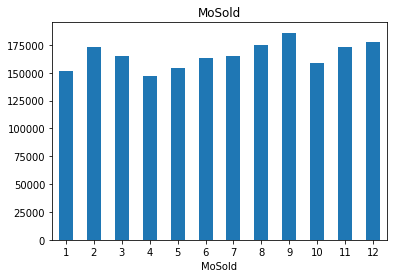

In [76]:
for var in dis_vars:
    analyze_discrete_vars(train_df, var)

In [415]:
cont_vars = [var for var in num_vars if var not in dis_vars + temp_vars+['Id','SalePrice']]

In [416]:
print(cont_vars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


In [417]:
def analyze_continuous_var(orig_df, var):
    df = orig_df.copy()
    plt.scatter(df[var], df['SalePrice'])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

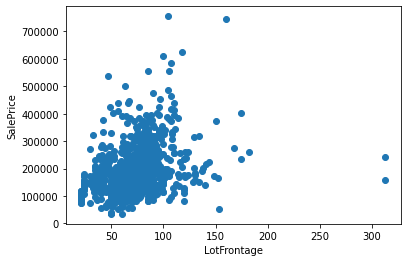

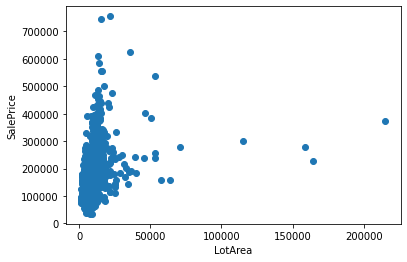

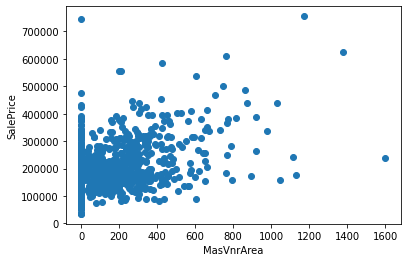

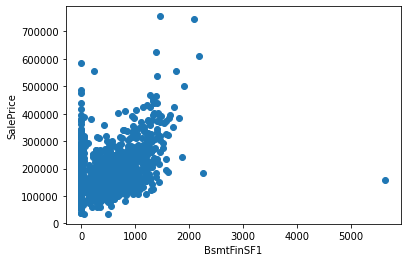

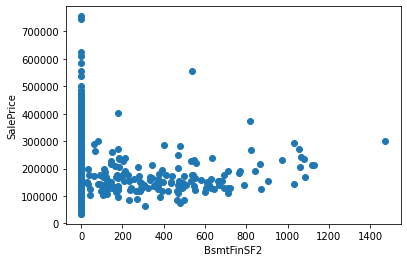

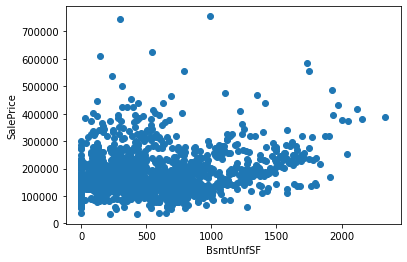

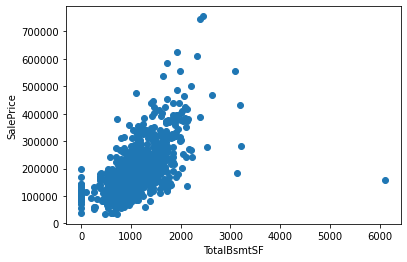

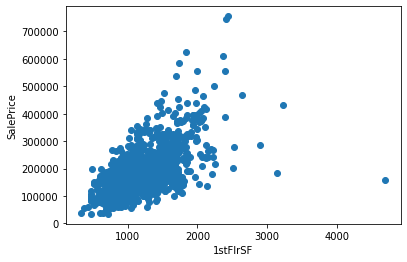

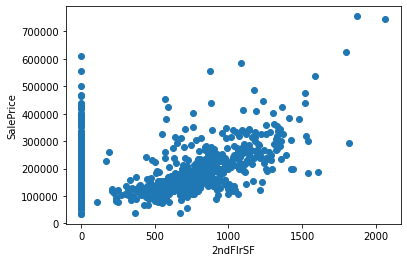

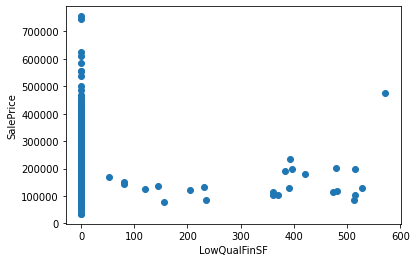

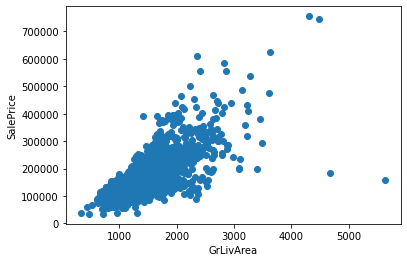

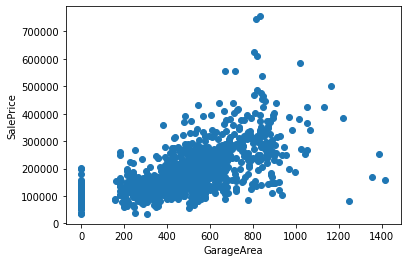

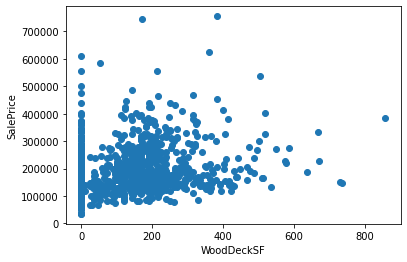

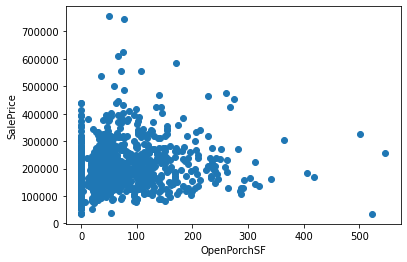

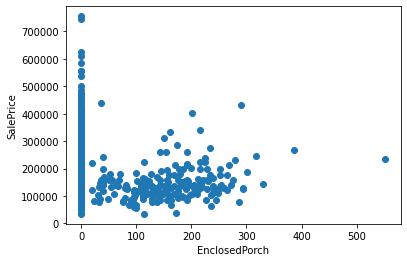

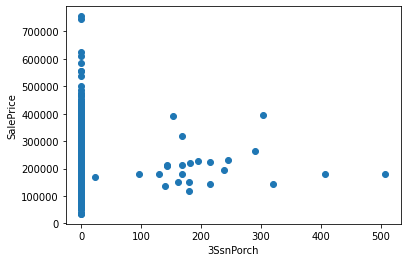

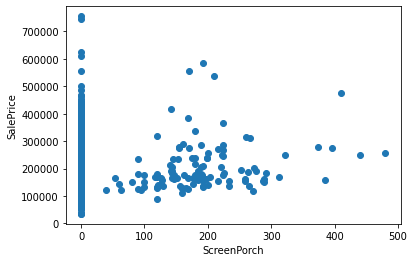

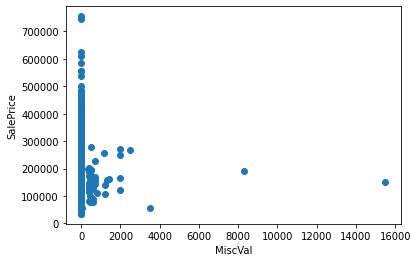

In [418]:
for var in cont_vars:
    analyze_continuous_var(train_df, var)

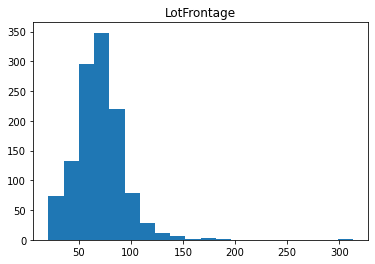

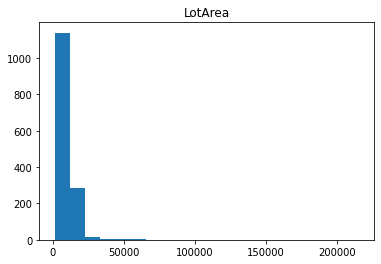

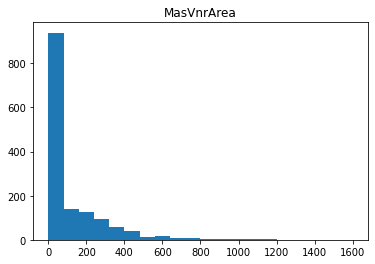

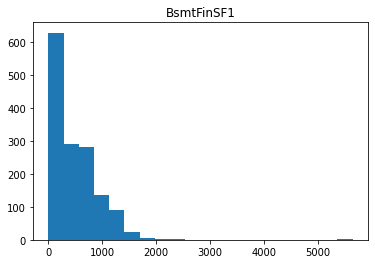

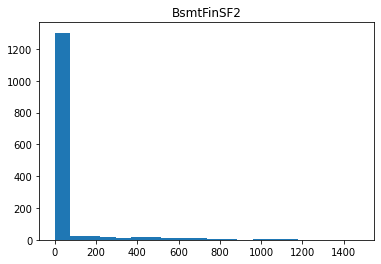

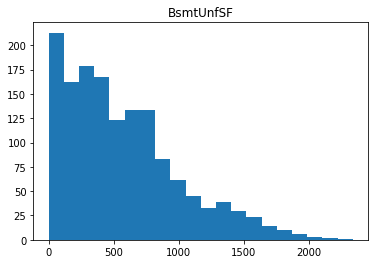

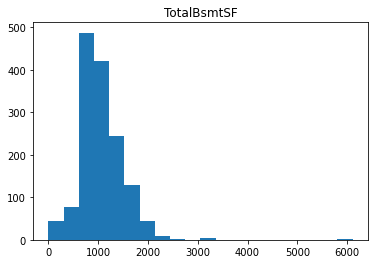

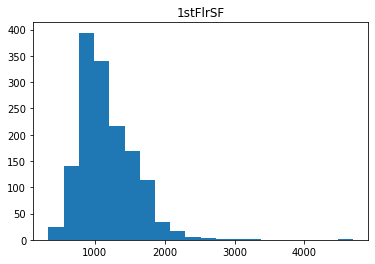

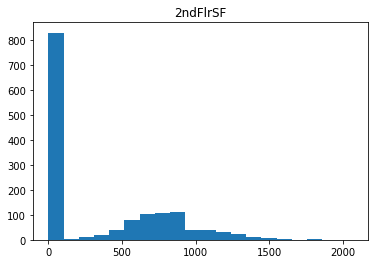

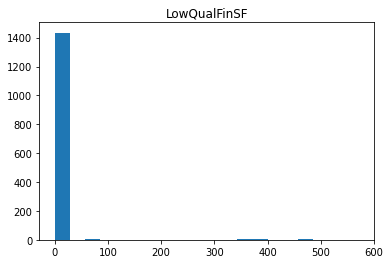

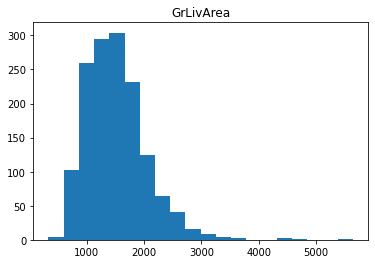

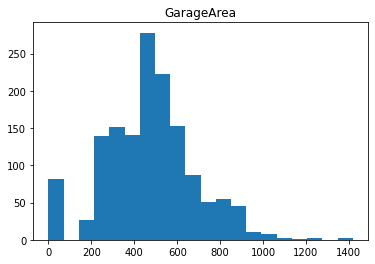

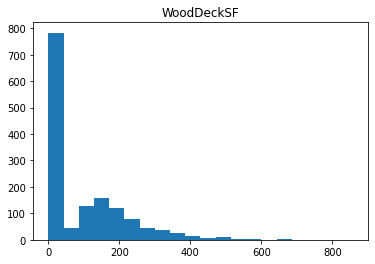

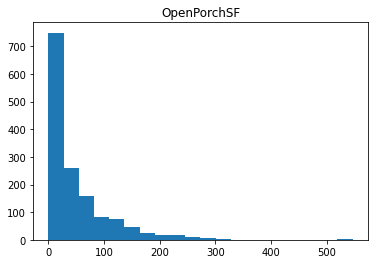

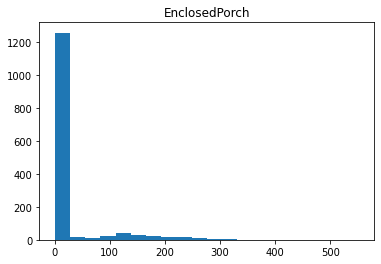

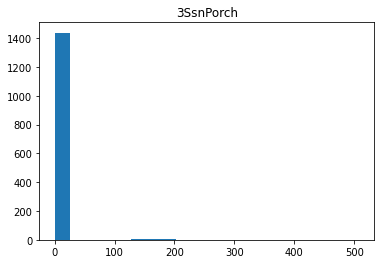

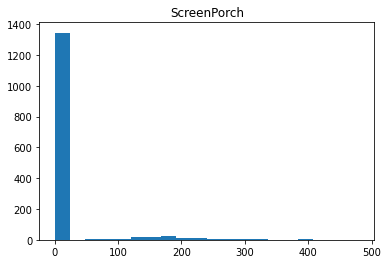

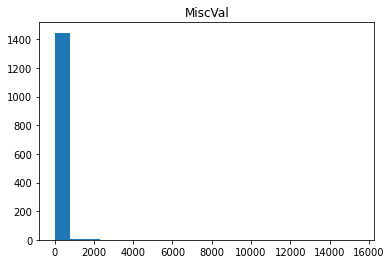

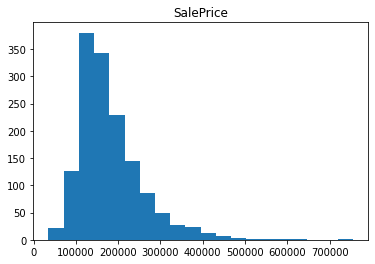

In [102]:
def analyze_distribution(orig_df, var):
    plt.hist(train_df[var], bins=20)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyze_distribution(train_df, var)

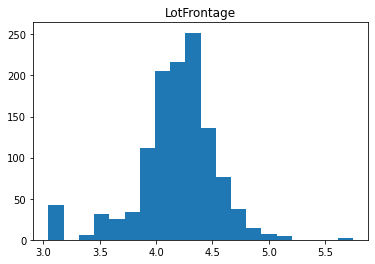

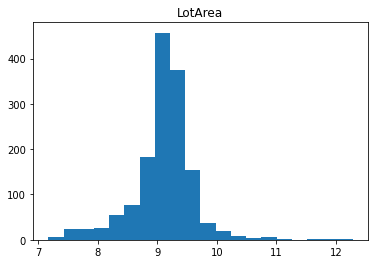

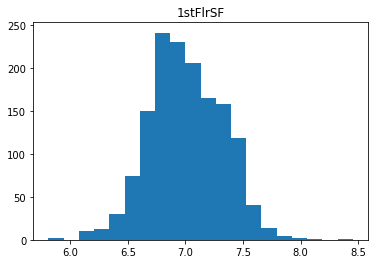

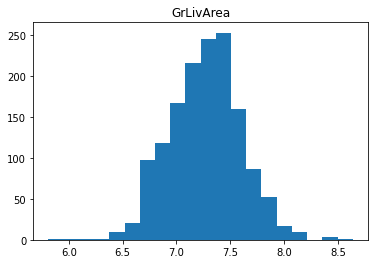

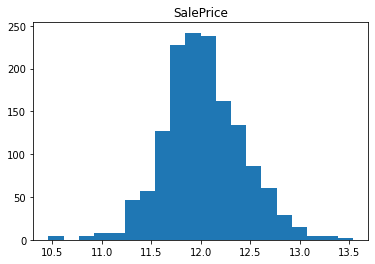

In [111]:
def analyze_distribution_with_transform(orig_df, var, method=None):
    df = orig_df.copy()
    if (df[var] <= 0).any():
        return
    
    if method is not None:    
        tf = PowerTransformer(method=method)
        df[var] = tf.fit_transform(np.array(df[var]).reshape(-1,1))
        plt.hist(df[var], bins=20)

        
    else:
        df[var] = np.log(df[var])
        plt.hist(df[var], bins=20)

    plt.title(var)
    plt.show()
        
for var in cont_vars:
    analyze_distribution_with_transform(train_df, var)

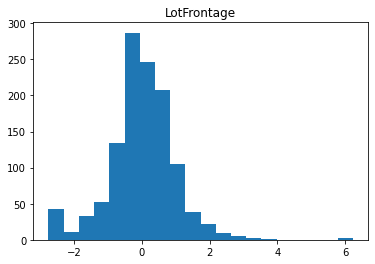

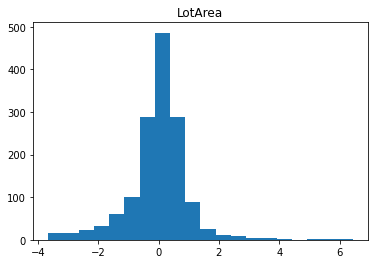

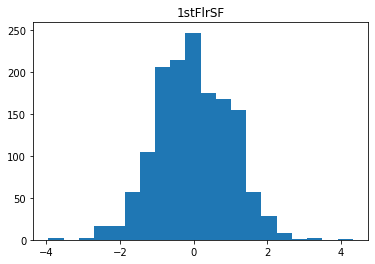

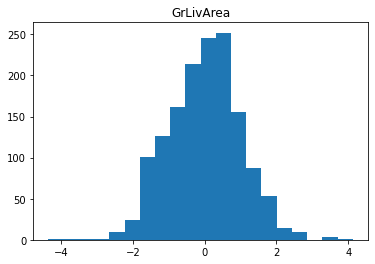

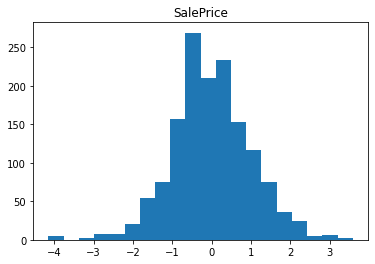

In [114]:
for var in cont_vars:
    analyze_distribution_with_transform(train_df, var, method='box-cox')

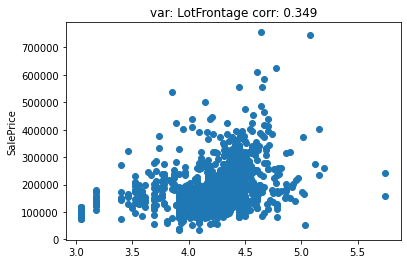

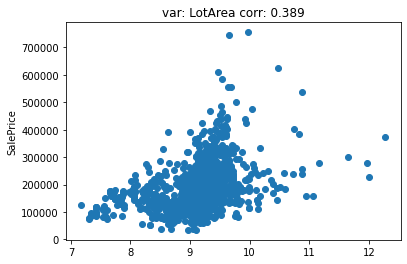

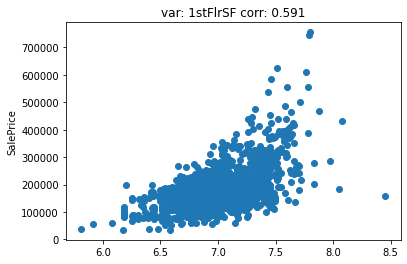

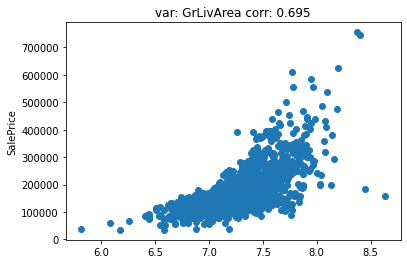

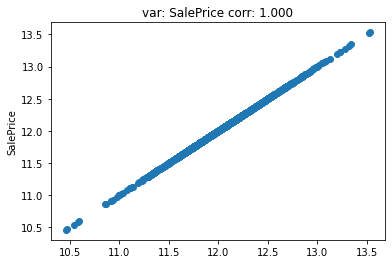

In [134]:
def analyze_cont_vars_with_transform(orig_df, var, method=None):
    df = orig_df.copy()
    if (df[var] <= 0).any():
        return
    
    if method is not None:    
        tf = PowerTransformer(method=method)
        df[var] = tf.fit_transform(np.array(df[var]).reshape(-1,1))
        
    else:
        df[var] = np.log(df[var])

    notnull_ind = df[var].notnull()
    plt.scatter(df[var], df['SalePrice'])
    plt.title(f'var: {var} corr: {np.corrcoef(df[var][notnull_ind], df["SalePrice"][notnull_ind])[0,1]:.3f}')
    plt.ylabel('SalePrice')
    plt.show()

for var in cont_vars:
    analyze_cont_vars_with_transform(train_df, var, method=None)

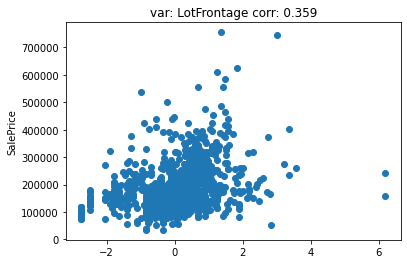

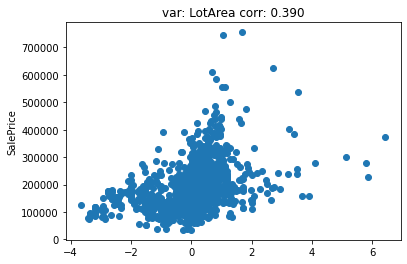

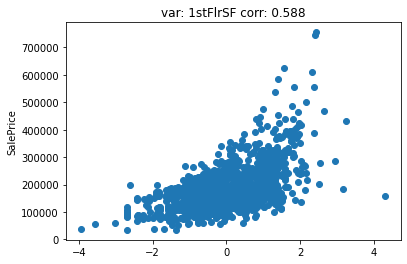

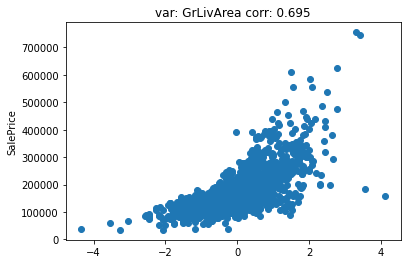

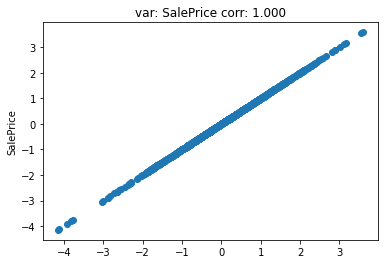

In [133]:
for var in cont_vars:
    analyze_cont_vars_with_transform(train_df, var, method='yeo-johnson')

In [150]:
def analyze_outlier(orig_df, var):
    df = orig_df.copy()
    isTf = False
    
    if not (df[var]<=0).any():
        isTf = True
        tf = PowerTransformer()
        df[var] = tf.fit_transform(np.array(df[var]).reshape(-1,1))

    plt.boxplot(df[var])
    plt.title(f'var: {var} transformed: {"Yes" if isTf else "No"}')
    plt.show()

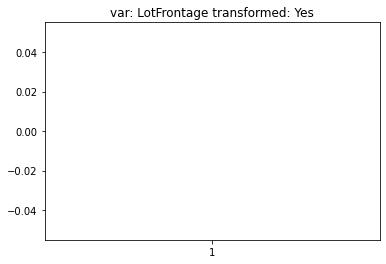

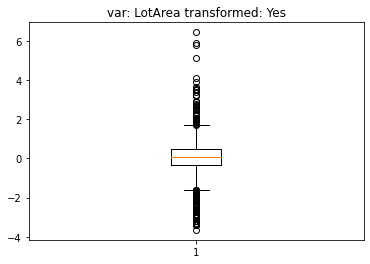

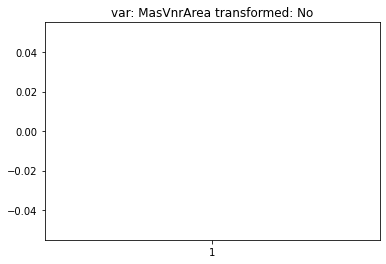

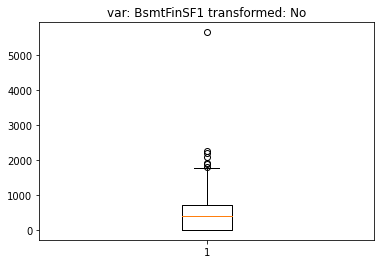

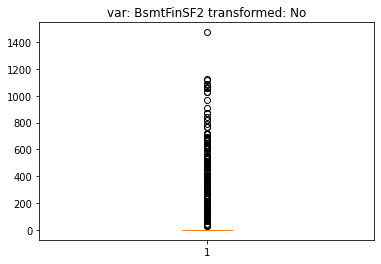

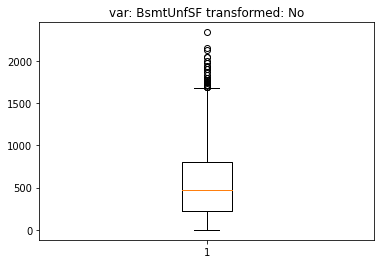

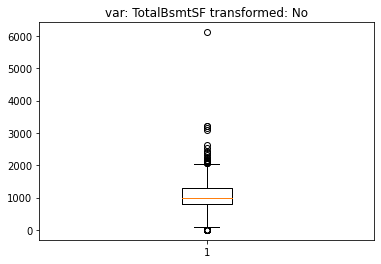

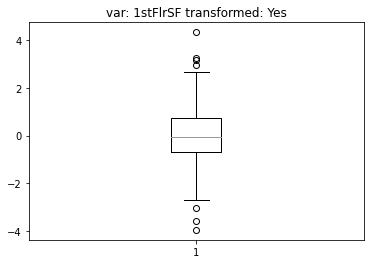

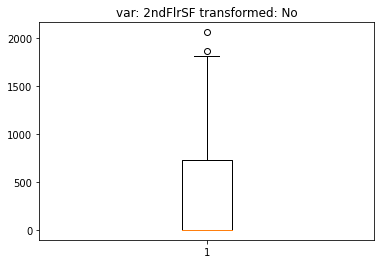

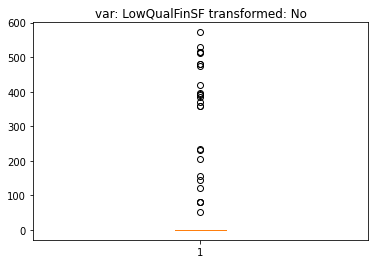

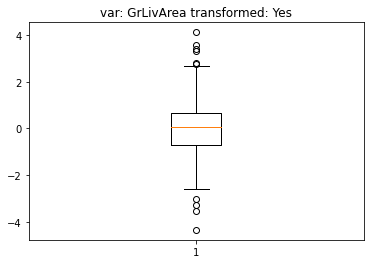

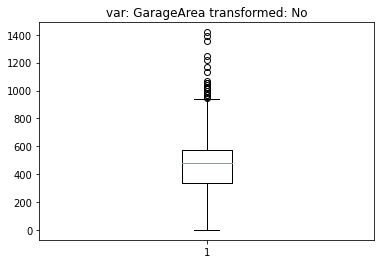

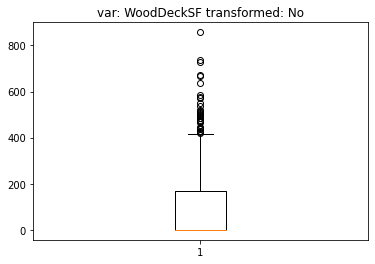

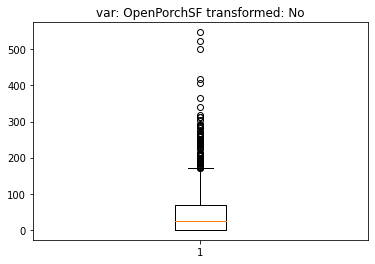

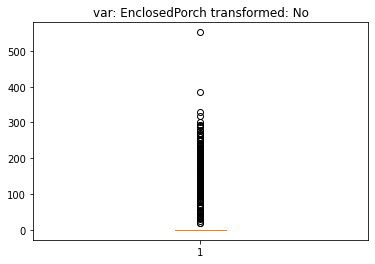

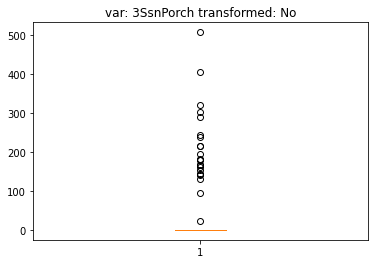

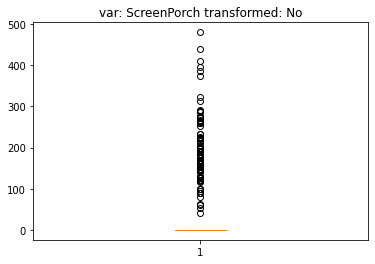

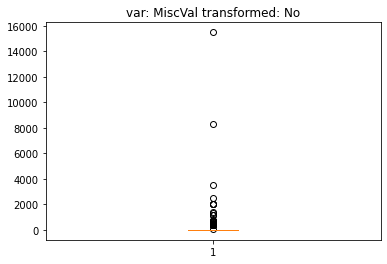

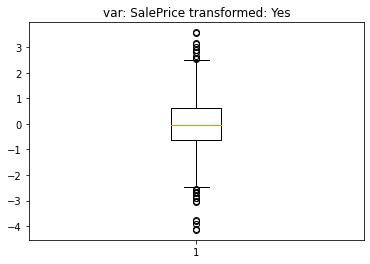

In [151]:
for var in cont_vars:
    analyze_outlier(train_df, var)

In [152]:
train_df[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [163]:
for var in cat_vars:
    print(var + ': '+ str(len(train_df[var].unique())))

MSZoning: 5
Street: 2
Alley: 3
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 5
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 6
KitchenQual: 4
Functional: 7
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 6
GarageCond: 6
PavedDrive: 3
PoolQC: 4
Fence: 5
MiscFeature: 5
SaleType: 9
SaleCondition: 6


In [177]:
def analyze_rare_labels(orig_df, var, plot=True, perc=0.01):
    df = orig_df.copy()
    series = df.groupby(var)[var].count()/len(df)
    
    if plot:
        plt.bar(series.index, series)
        plt.title(var)
        plt.show()
    else:
        print(series[series < perc])

In [180]:
for var in cat_vars:
    analyze_rare_labels(train_df, var, plot=False)

MSZoning
C (all)    0.0068
Name: MSZoning, dtype: float64
Street
Grvl    0.0041
Name: Street, dtype: float64
Series([], Name: Alley, dtype: float64)
LotShape
IR3    0.0068
Name: LotShape, dtype: float64
Series([], Name: LandContour, dtype: float64)
Utilities
NoSeWa    0.0007
Name: Utilities, dtype: float64
LotConfig
FR3    0.0027
Name: LotConfig, dtype: float64
LandSlope
Sev    0.0089
Name: LandSlope, dtype: float64
Neighborhood
Blueste    0.0014
NPkVill    0.0062
Veenker    0.0075
Name: Neighborhood, dtype: float64
Condition1
PosA    0.0055
RRAe    0.0075
RRNe    0.0014
RRNn    0.0034
Name: Condition1, dtype: float64
Condition2
Artery    0.0014
Feedr     0.0041
PosA      0.0007
PosN      0.0014
RRAe      0.0007
RRAn      0.0007
RRNn      0.0014
Name: Condition2, dtype: float64
Series([], Name: BldgType, dtype: float64)
HouseStyle
1.5Unf    0.0096
2.5Fin    0.0055
2.5Unf    0.0075
Name: HouseStyle, dtype: float64
RoofStyle
Flat       0.0089
Gambrel    0.0075
Mansard    0.0048
Shed     

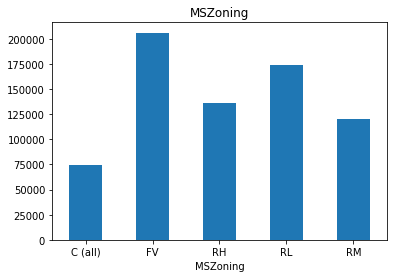

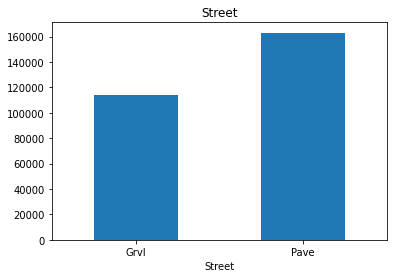

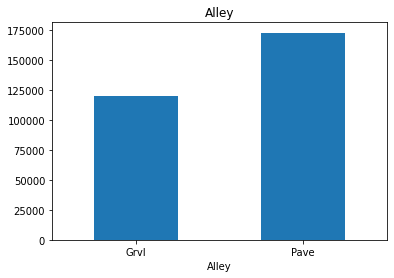

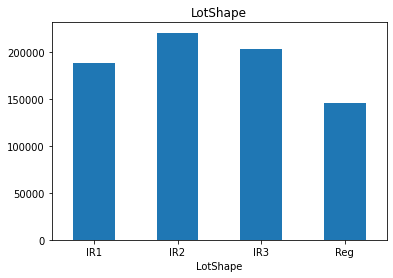

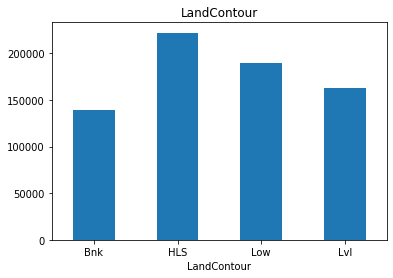

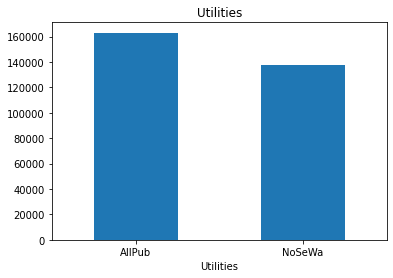

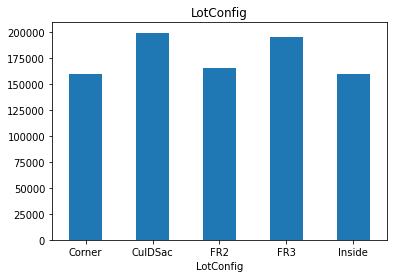

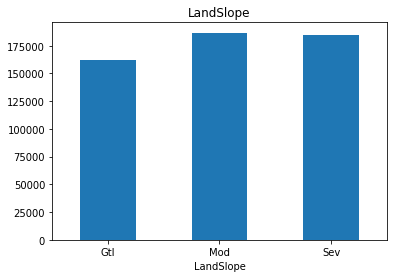

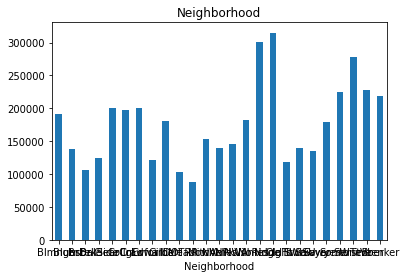

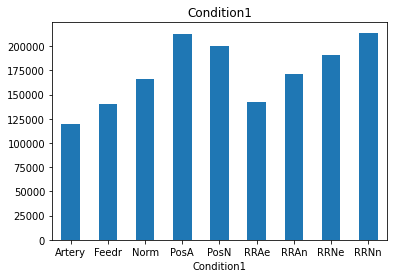

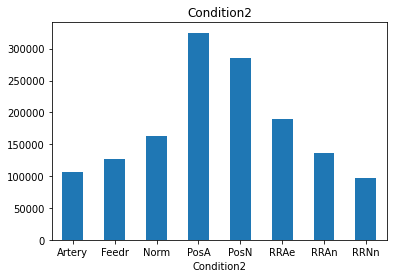

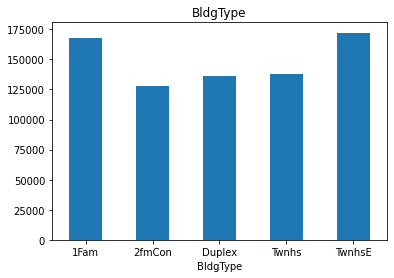

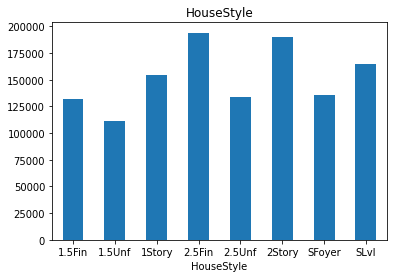

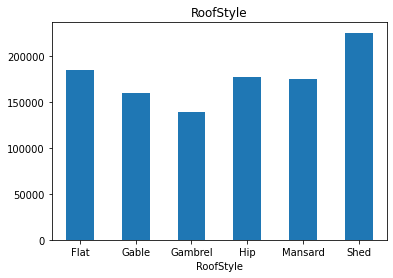

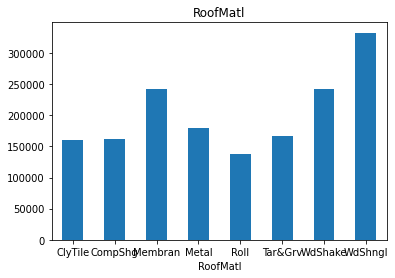

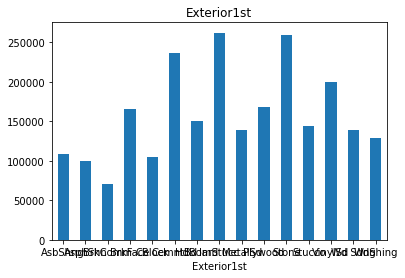

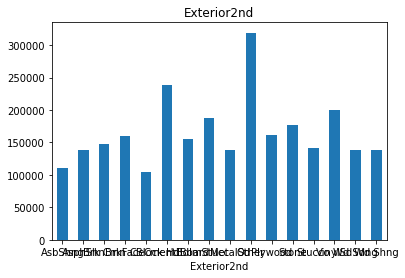

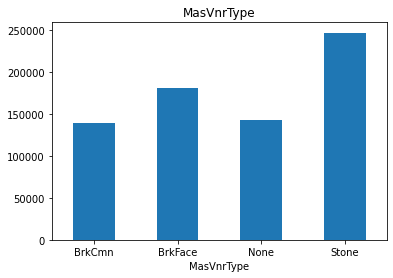

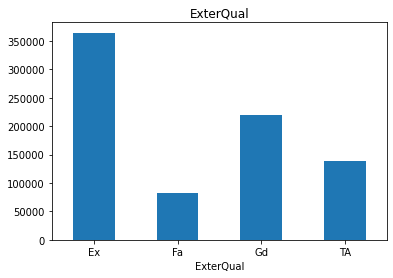

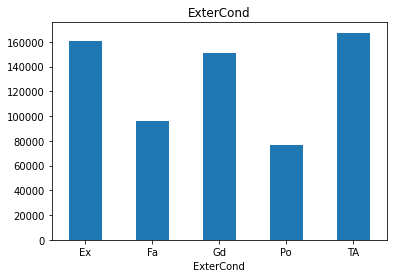

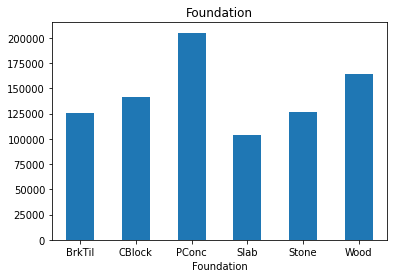

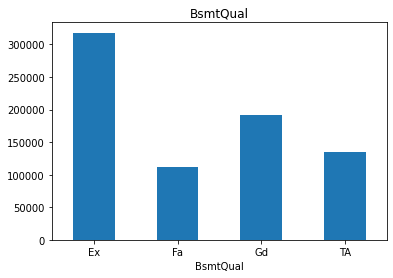

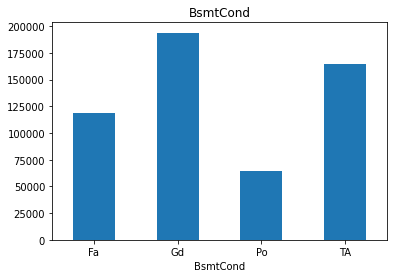

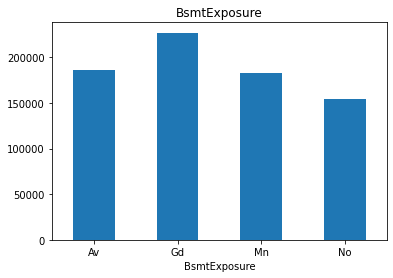

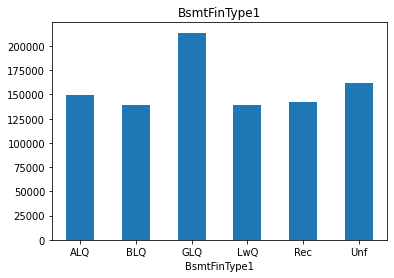

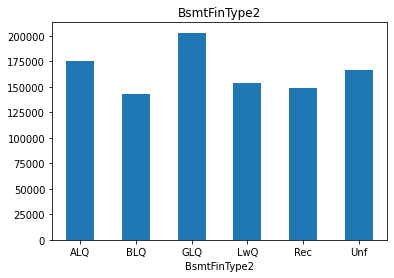

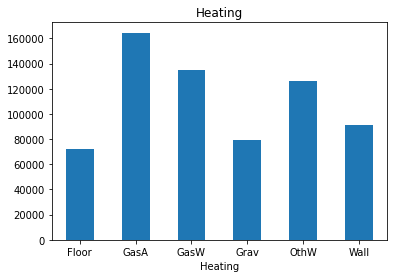

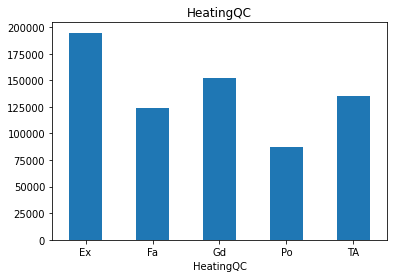

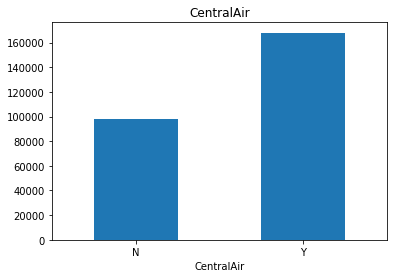

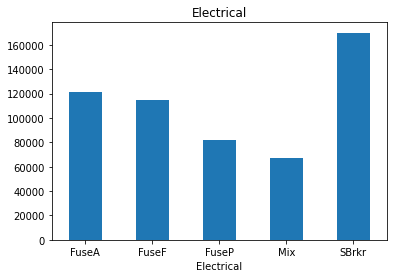

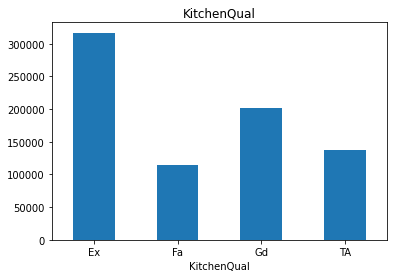

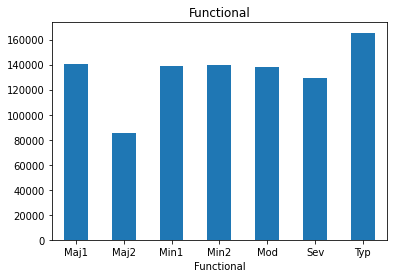

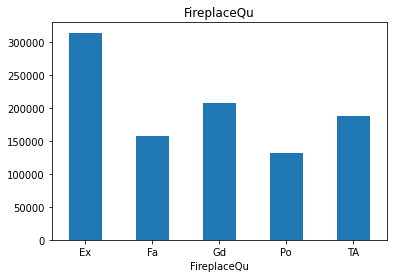

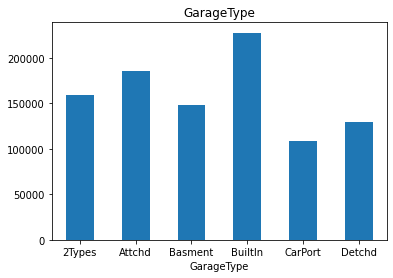

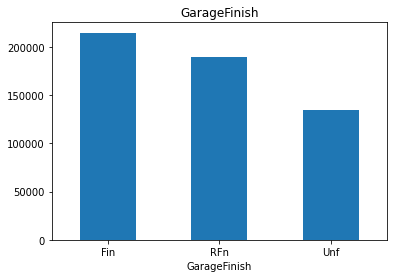

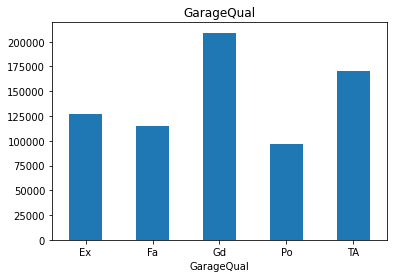

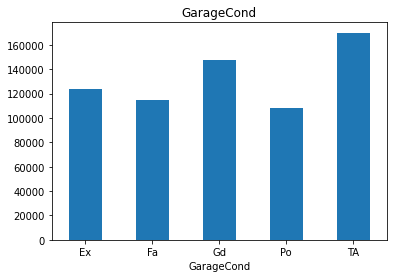

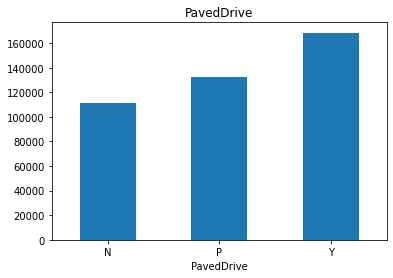

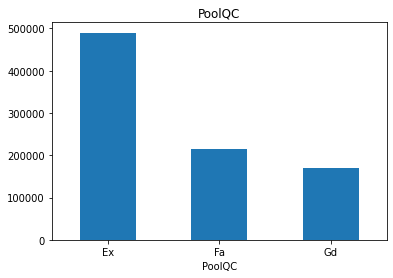

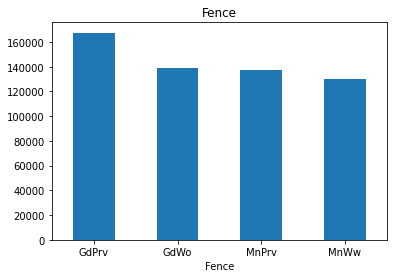

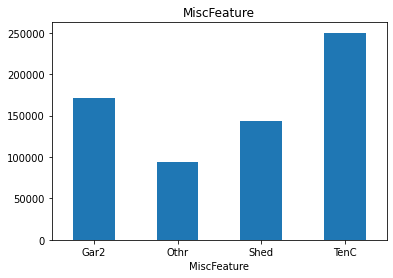

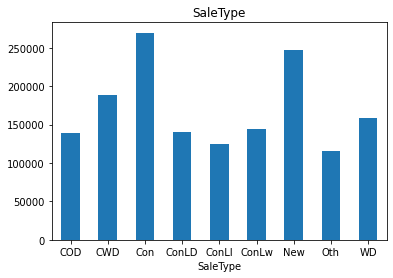

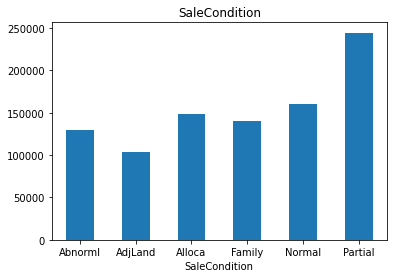

In [181]:
for var in cat_vars:
    analyze_discrete_vars(train_df, var)

# Feature engineering

## Fill missing values

In [266]:
# fill missing value with mean
np.random.seed(42)
x_train, x_valid, y_train, y_valid = train_test_split(
    train_df.drop(columns=['SalePrice']), train_df['SalePrice'], 
    test_size=0.15)

In [267]:
print(x_train.shape)
print(x_valid.shape)

(1241, 80)
(219, 80)


In [441]:
cat_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
num_imputer = SimpleImputer(strategy="median", add_indicator=True)

cat_imputer.fit(x_train[cat_vars])
num_imputer.fit(x_train[num_vars])

def fill_missing_values(orig_df):
    df = orig_df.copy()
    

    df[cat_vars] = cat_imputer.transform(df[cat_vars])

    num_impute_w_indicator = num_imputer.transform(df[num_vars])

    # find increaseing feature of num indicator
    num_indicator = num_impute_w_indicator.shape[1] - df[num_vars].shape[1] 
    df[num_vars] = num_impute_w_indicator[:, :-num_indicator]

    for i in range(num_indicator):
        df[str(i)+"_na"] = num_impute_w_indicator[:, -i-1]
        
    return df, cat_imputer, num_imputer

In [443]:
x_train_filled, cat_imputer, num_imputer = fill_missing_values(x_train)
x_valid_filled, _, _ = fill_missing_values(x_valid)

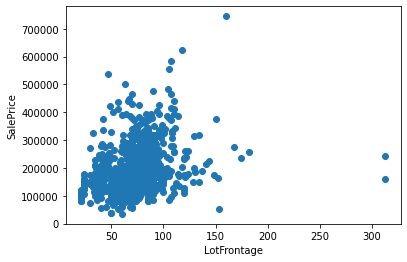

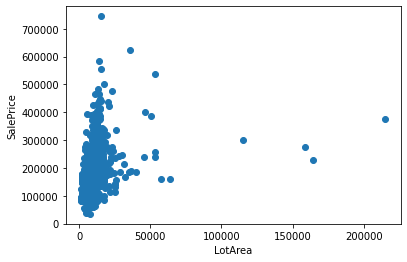

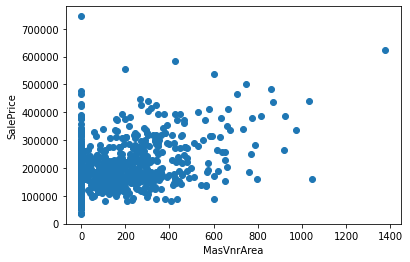

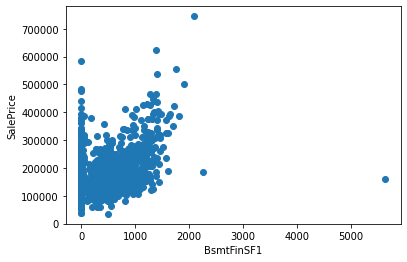

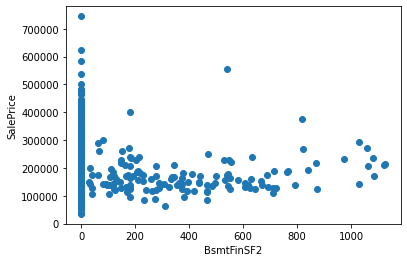

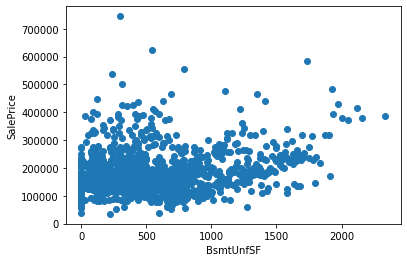

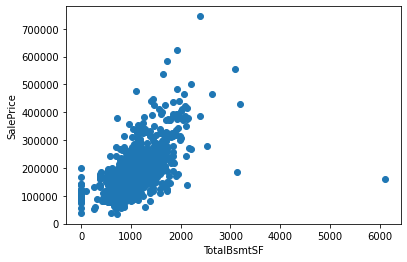

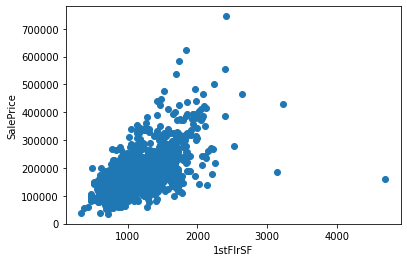

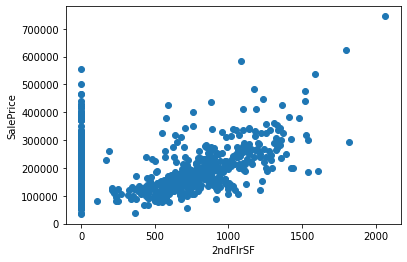

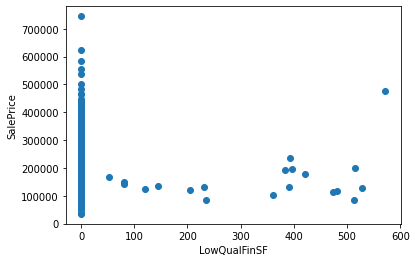

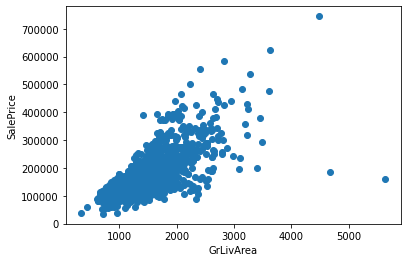

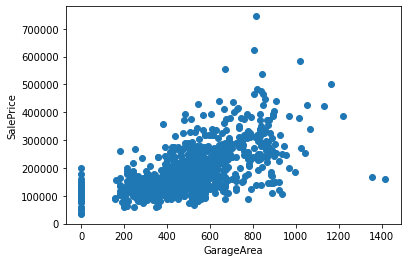

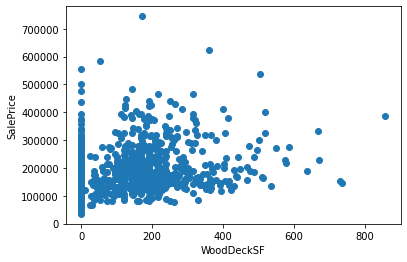

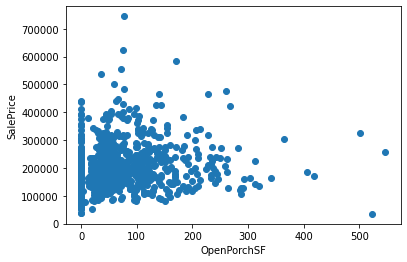

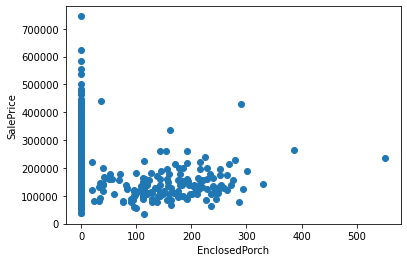

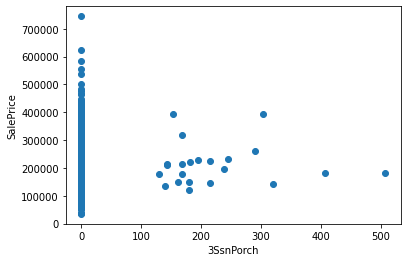

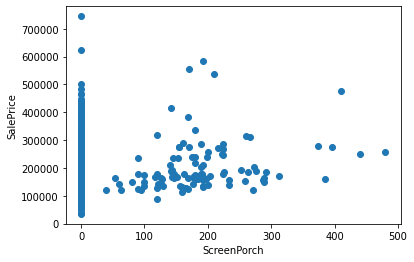

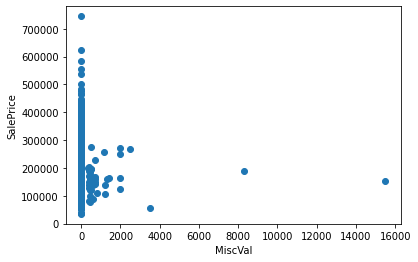

In [446]:
temp = x_train_filled.copy()
temp['SalePrice']=y_train
for var in cont_vars:
    analyze_continuous_var(temp, var)

## Log transform 

In [447]:
tf = PowerTransformer()
x_train_tf = x_train_filled.copy()
x_valid_tf = x_valid_filled.copy()

tf.fit(x_train_tf[cont_vars])
x_train_tf[cont_vars] = tf.transform(x_train_tf[cont_vars])
x_valid_tf[cont_vars] = tf.transform(x_valid_tf[cont_vars])

In [448]:
x_valid_tf.shape

(219, 83)

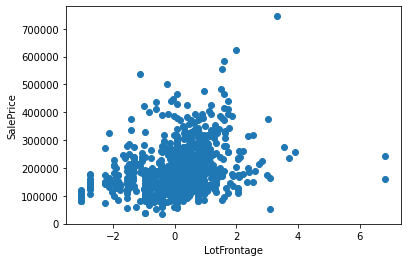

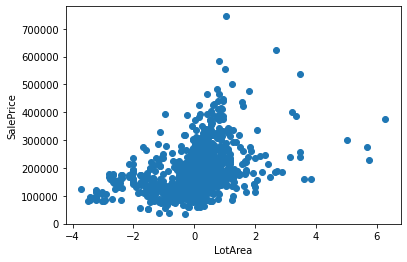

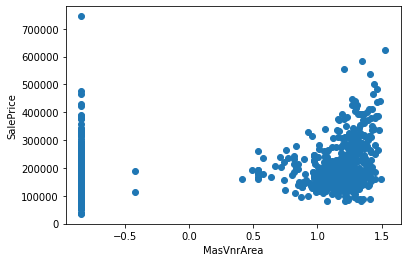

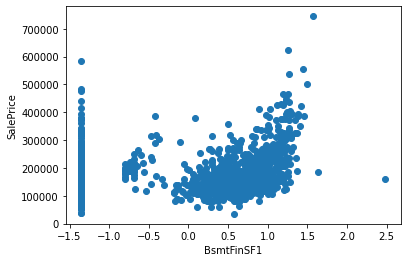

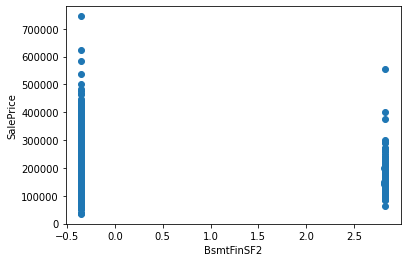

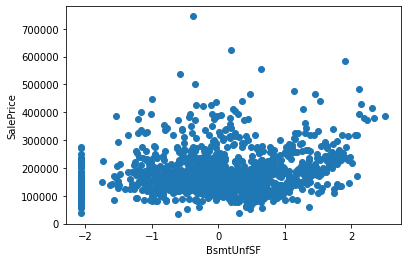

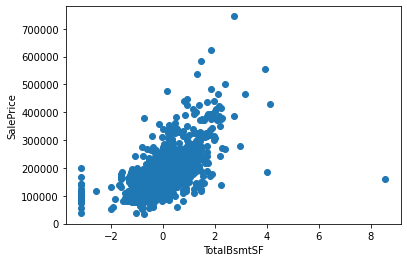

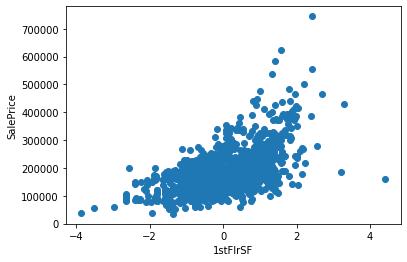

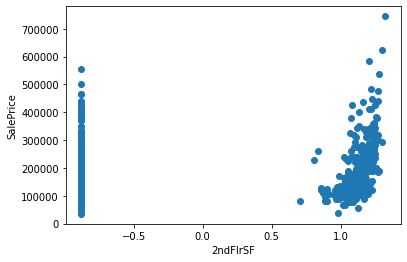

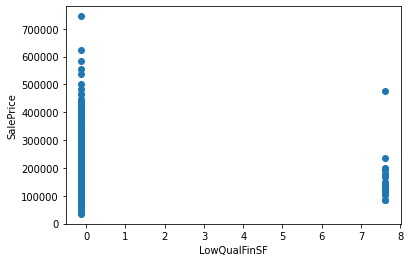

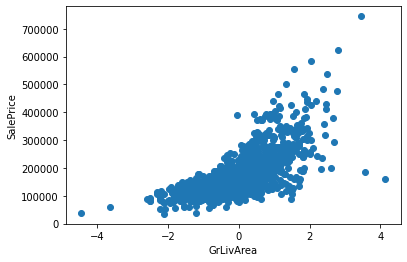

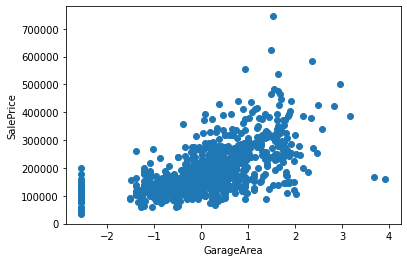

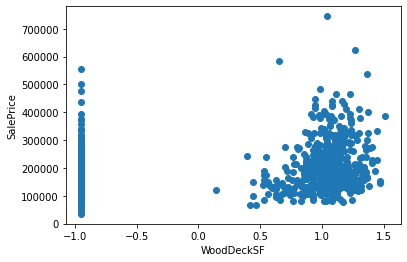

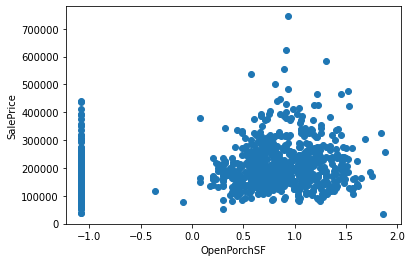

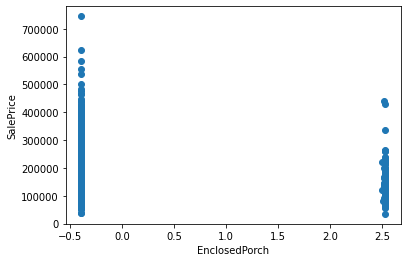

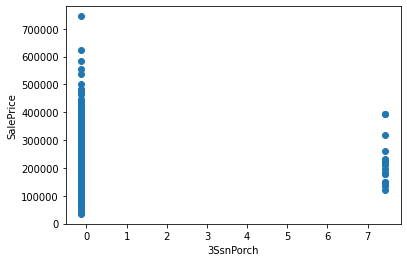

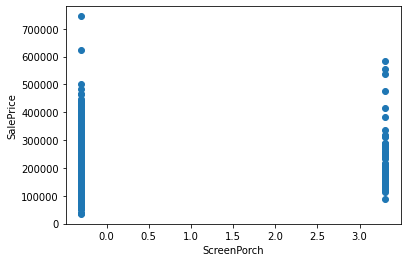

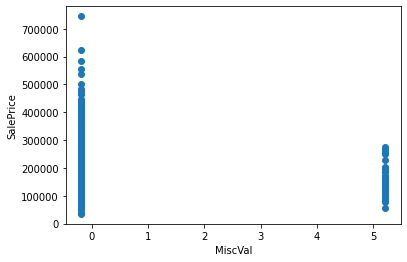

In [421]:
temp = x_train_tf.copy()
temp['SalePrice']=y_train
for var in cont_vars:
    analyze_continuous_var(temp, var)

## Remove rare labels

In [449]:
def identify_rare_labels(orig_df, var):
    df = orig_df.copy()
    new_df = df.groupby(var)[var].count()/len(df)
    return new_df[new_df < 0.01].dropna().index

def remove_rare_label(orig_df):
    df = orig_df.copy()
    
    for var in cat_vars:
        rare_label = identify_rare_labels(df, var)
        df[var] = np.where(df[var].isin(rare_label), 'rare', df[var])
        
    return df
    
x_train_fill_rmrare = remove_rare_label(x_train_tf)
x_valid_fill_rmrare = remove_rare_label(x_valid_tf)

## Label encoding

In [451]:
def label_encoding_w_order(orig_df_train, orig_df_valid, var):
    df = orig_df_train.copy()
    df_valid = orig_df_valid.copy()
    
    label = df.groupby(var)['SalePrice'].median().sort_values().index
    word_index = {k:i for i, k in enumerate(label)}
    df[var] = df[var].map(word_index)
    df_valid[var] = df_valid[var].map(word_index)
    return df[var], df_valid[var]

x_train_prep = x_train_fill_rmrare.copy()
x_valid_prep = x_valid_fill_rmrare.copy()

temp = x_train_fill_rmrare.copy()
temp['SalePrice'] = y_train
    
for var in cat_vars:
    x_train_prep[var], x_valid_prep[var] = label_encoding_w_order(temp, x_valid_fill_rmrare, var)

## Label encoding w/o ordering
label_encoder = OrdinalEncoder()
label_encoder.fit(x_train_fill_rmrare[cat_vars])

x_train_prep = x_train_fill_rmrare.copy()
x_train_prep[cat_vars] = label_encoder.transform(x_train_fill_rmrare[cat_vars])

x_train_prep[cat_vars].head()

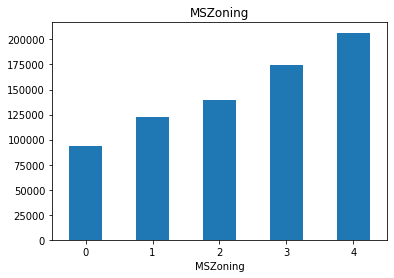

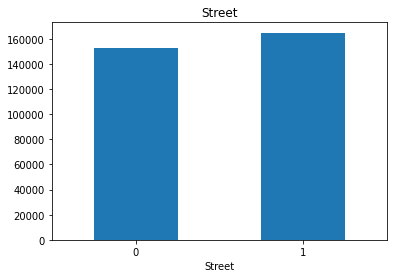

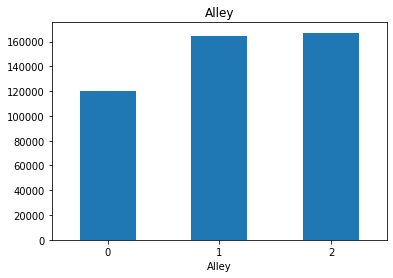

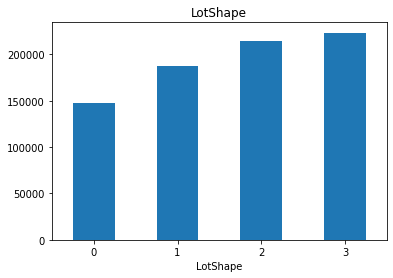

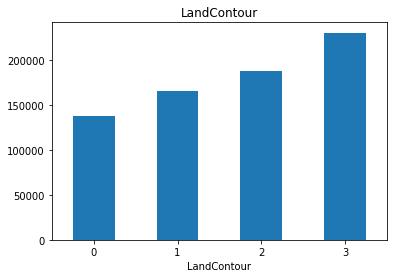

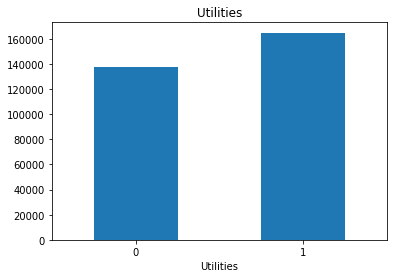

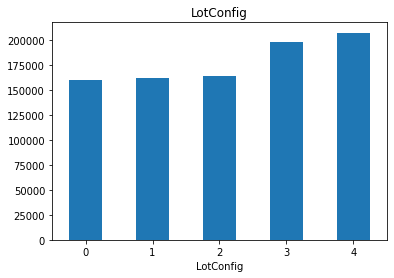

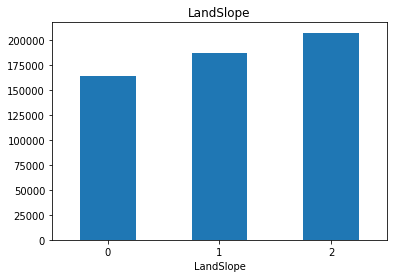

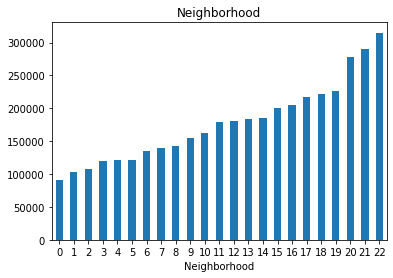

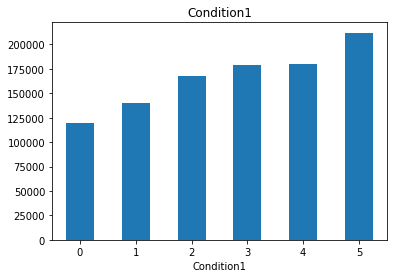

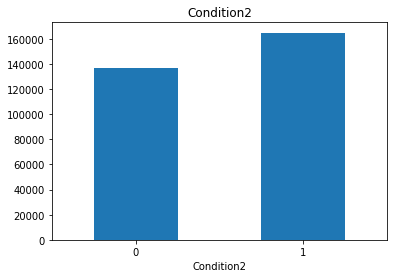

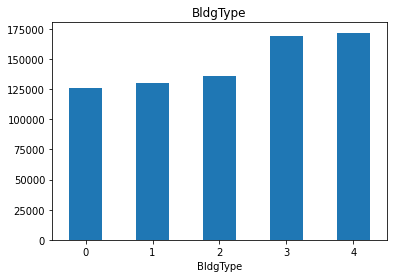

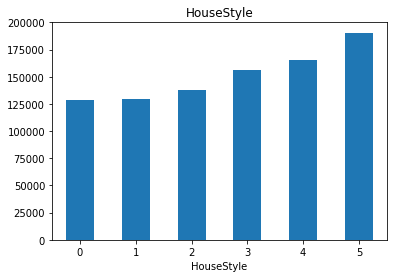

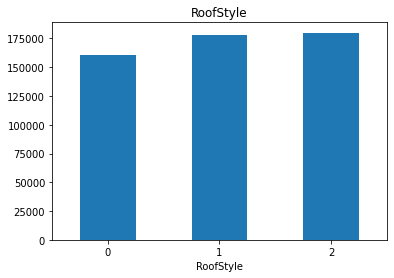

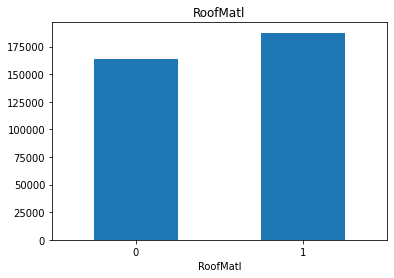

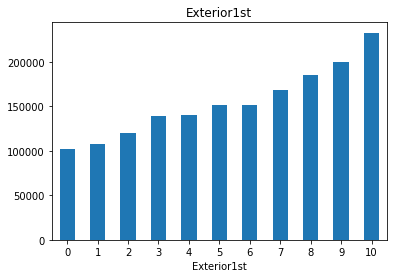

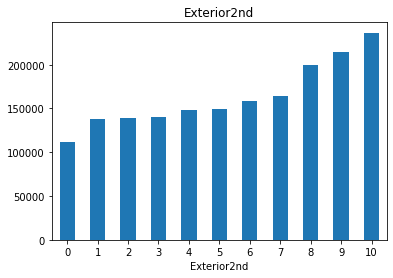

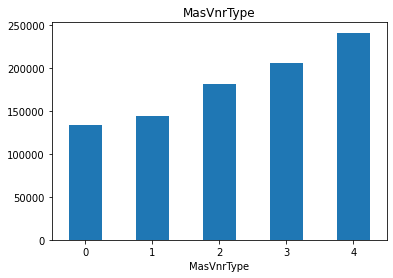

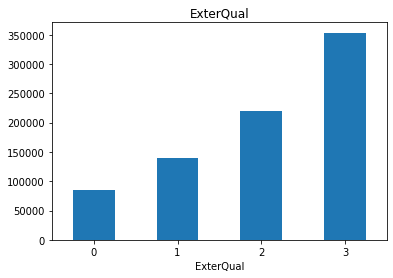

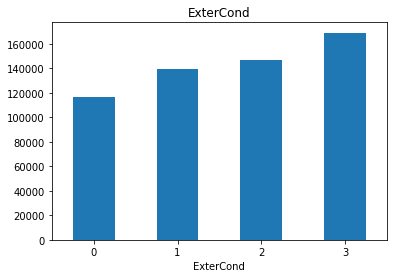

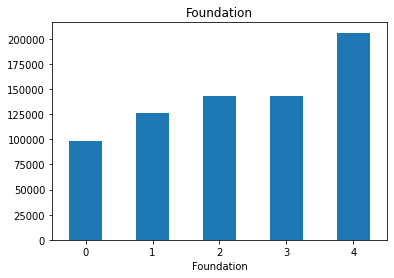

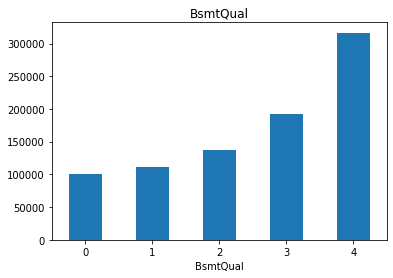

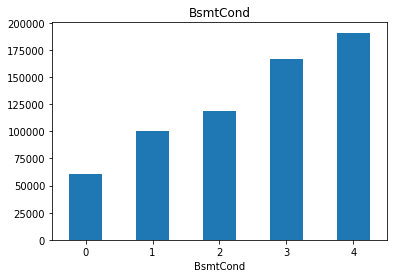

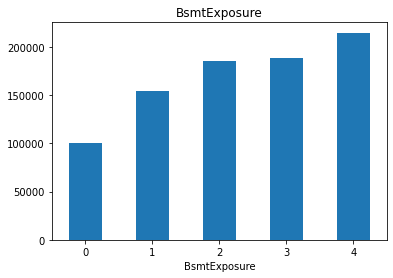

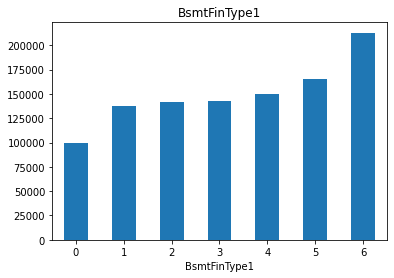

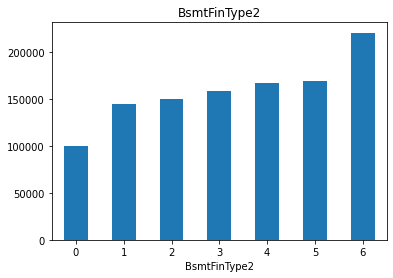

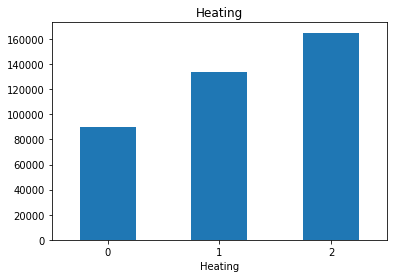

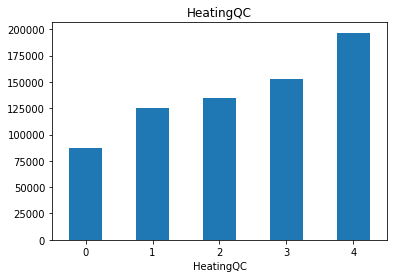

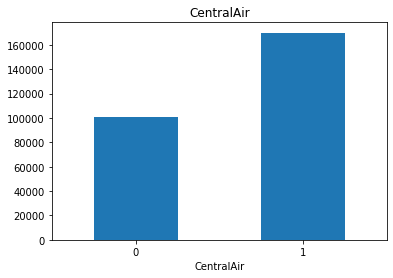

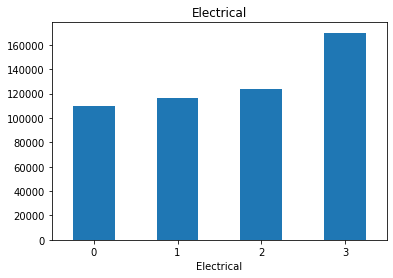

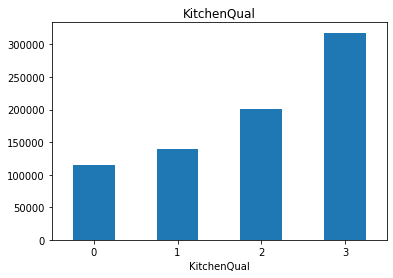

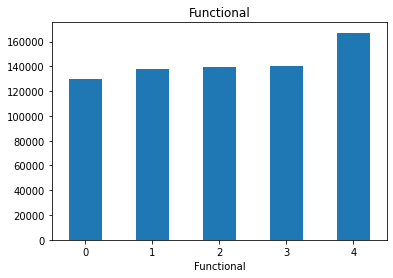

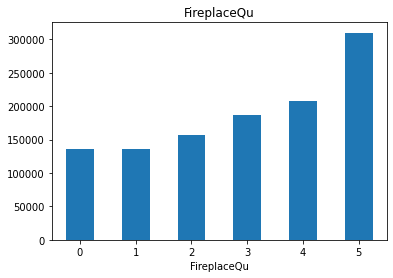

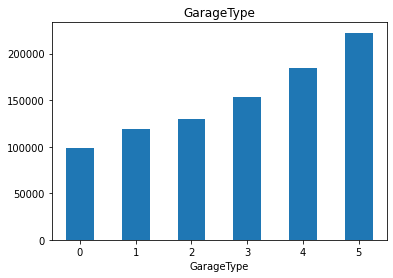

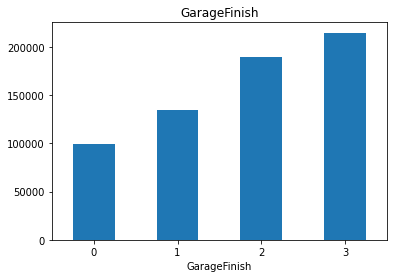

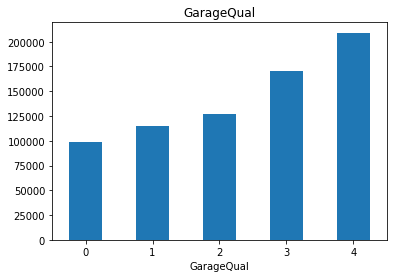

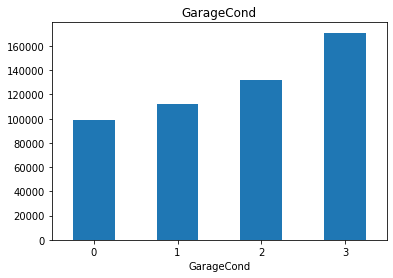

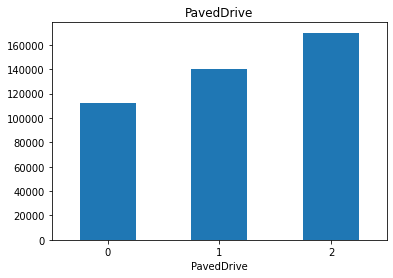

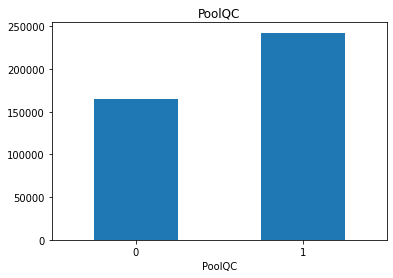

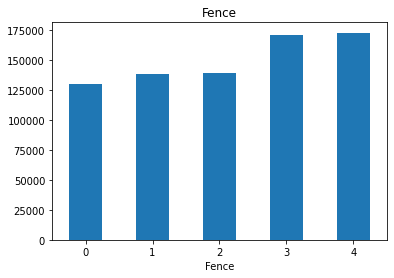

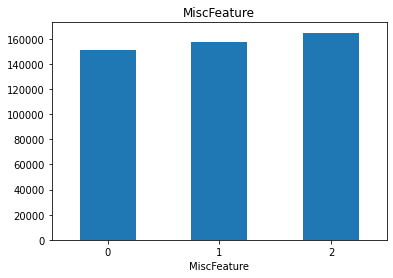

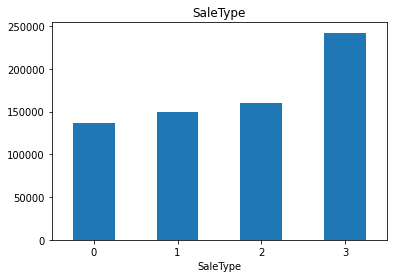

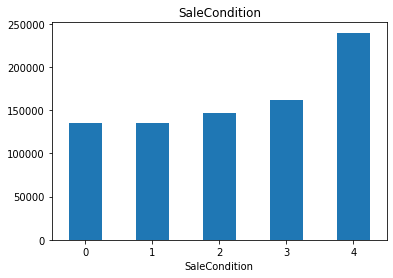

In [432]:
temp = x_train_prep.copy()
temp['SalePrice'] = y_train

for var in cat_vars:
    analyze_discrete_vars(temp, var)

In [433]:
train_vars = [var for var in x_train_prep.columns if var not in ['Id', 'SalePrice']]

In [452]:
scaler = MinMaxScaler()
x_train_fullprep = x_train_prep[train_vars].copy()
x_valid_fullprep = x_valid_prep[train_vars].copy()

x_train_fullprep[train_vars] = scaler.fit_transform(x_train_fullprep[train_vars])
x_valid_fullprep[train_vars] = scaler.transform(x_valid_fullprep[train_vars])

In [454]:
x_train_fullprep.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1241.0,0.2183,0.2505,0.0,0.0000,0.1765,0.2941,1.0
MSZoning,1241.0,0.6801,0.1960,0.0,0.7500,0.7500,0.7500,1.0
LotFrontage,1241.0,0.3075,0.1013,0.0,0.2667,0.3164,0.3577,1.0
LotArea,1241.0,0.3719,0.1000,0.0,0.3356,0.3812,0.4194,1.0
Street,1241.0,0.9968,0.0567,0.0,1.0000,1.0000,1.0000,1.0
...,...,...,...,...,...,...,...,...
SaleType,1241.0,0.6680,0.1581,0.0,0.6667,0.6667,0.6667,1.0
SaleCondition,1241.0,0.7117,0.2140,0.0,0.7500,0.7500,0.7500,1.0
0_na,1241.0,0.0532,0.2245,0.0,0.0000,0.0000,0.0000,1.0
1_na,1241.0,0.0056,0.0749,0.0,0.0000,0.0000,0.0000,1.0


In [453]:
x_valid_fullprep.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,219.0,0.2096,0.2395,0.0000,0.0000,0.1765,0.2647,1.0000
MSZoning,215.0,0.6802,0.2017,0.0000,0.7500,0.7500,0.7500,1.0000
LotFrontage,219.0,0.3073,0.1010,0.0000,0.2667,0.3164,0.3621,0.6825
LotArea,219.0,0.3625,0.1011,0.0258,0.3293,0.3687,0.4115,0.7752
Street,219.0,0.9909,0.0953,0.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...
SaleType,219.0,0.6712,0.1480,0.0000,0.6667,0.6667,0.6667,1.0000
SaleCondition,215.0,0.7105,0.2193,0.0000,0.7500,0.7500,0.7500,1.0000
0_na,219.0,0.0685,0.2532,0.0000,0.0000,0.0000,0.0000,1.0000
1_na,219.0,0.0046,0.0676,0.0000,0.0000,0.0000,0.0000,1.0000


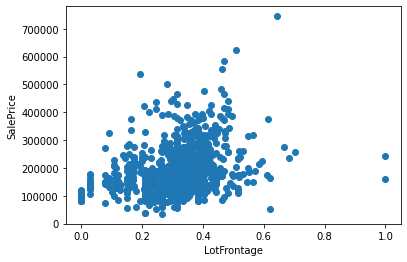

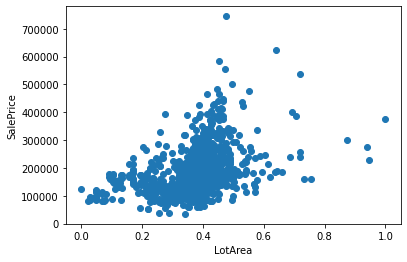

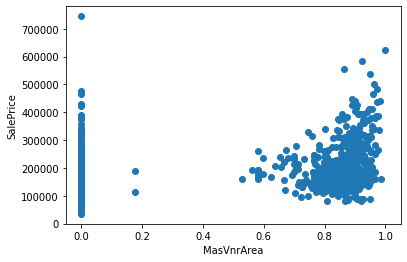

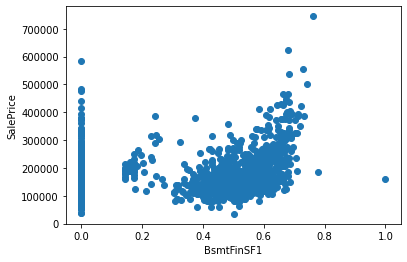

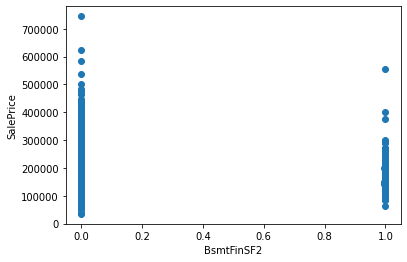

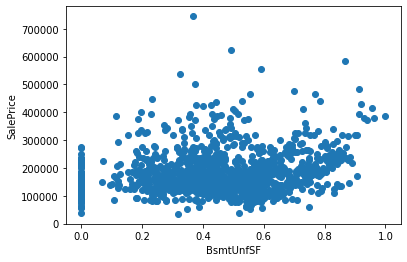

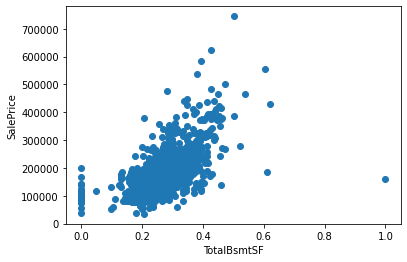

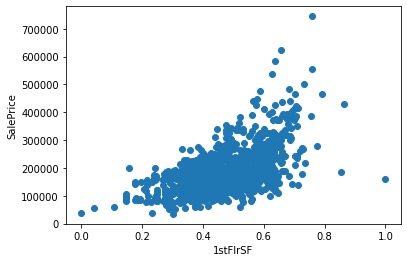

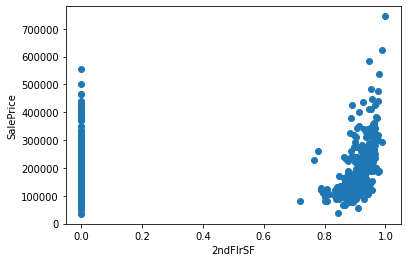

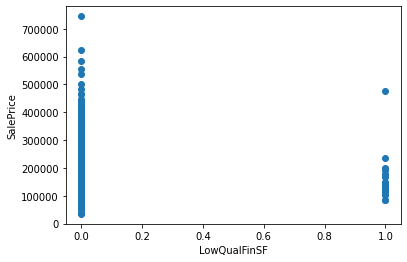

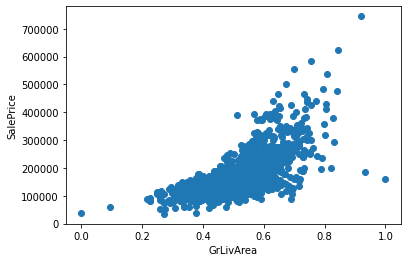

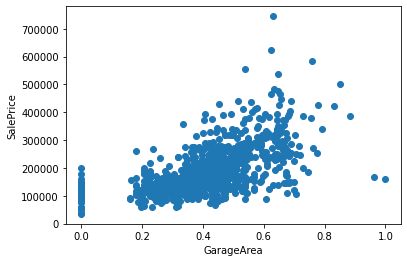

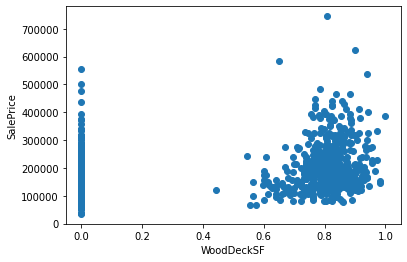

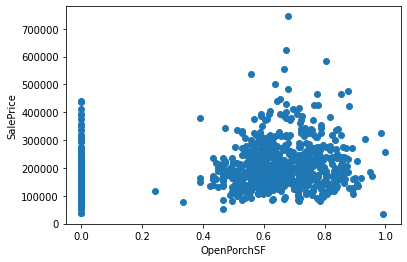

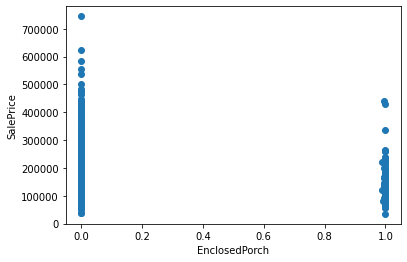

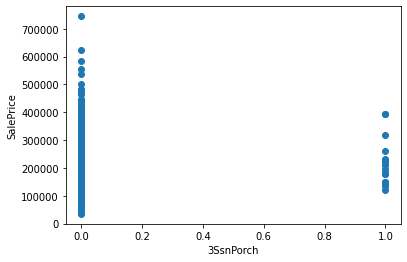

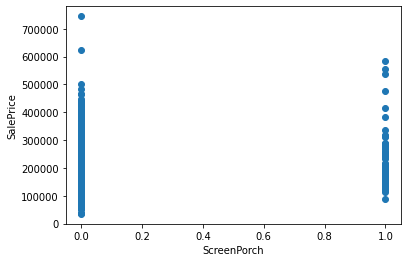

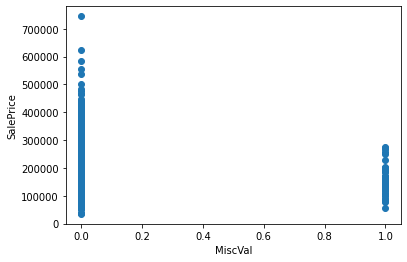

In [436]:
temp = x_train_fullprep.copy()
temp['SalePrice']=y_train
for var in cont_vars:
    analyze_continuous_var(temp, var)

In [438]:
# export to csv
x_train_fullprep.to_csv(root/'xtrain.csv')